<a href="https://colab.research.google.com/github/SANGDONKIM/pytorch_d2l/blob/main/pytorch_geometric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt
from matplotlib import colors 
plt.rcParams.update({"font.size" : 16})

In [56]:
input_dim = 1
output_dim = 1

A = 2*np.random.rand(output_dim, input_dim) - 1
b = 2*np.random.rand(output_dim) - 1

true_model = lambda x: A@x + b # lambda 매개변수 : 결과 



In [68]:
n_train = 1000
noise_level = 0.04

# Generate a random set of n_train samples
X_train = np.random.rand(n_train, input_dim)
y_train = np.array([true_model(x) for x in X_train])

# Add some noise
y_train += noise_level * np.random.standard_normal(size=y_train.shape)

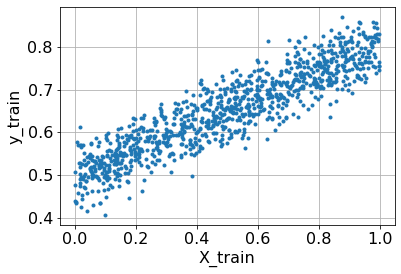

In [69]:

if input_dim == output_dim == 1:
    fig = plt.figure()
    fig.clf()
    ax = fig.gca()
    ax.plot(X_train, y_train, '.')
    ax.grid(True)
    ax.set_xlabel('X_train')
    ax.set_ylabel('y_train')

# pytorch dataset 

In [71]:
#!git clone https://github.com/SANGDONKIM/PytorchGeometricTutorial.git


Cloning into 'PytorchGeometricTutorial'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 246 (delta 84), reused 202 (delta 44), pack-reused 0
Receiving objects: 100% (246/246), 17.43 MiB | 43.00 KiB/s, done.
Resolving deltas: 100% (84/84), done.


In [85]:
class VectorialDataset(torch.utils.data.Dataset):
    def __init__(self, input_data, output_data):
        super(VectorialDataset, self).__init__()
        self.input_data = torch.tensor(input_data.astype('f'))
        self.output_data = torch.tensor(output_data.astype('f'))
        
    def __len__(self):
        return self.input_data.shape[0]
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist() # list로 변환 
        sample = (self.input_data[idx, :], 
                  self.output_data[idx, :])  
        return sample 
    

In [87]:
training_set = VectorialDataset(input_data = X_train, output_data = y_train)
len(training_dataset)
training_set[10:12]

(tensor([[0.1112],
         [0.8843]]), tensor([[0.5139],
         [0.7791]]))

# DataLoader
- class 데이터셋을 만들면 DataLoader 사용 가능 
- DataLoader는 dataset, batch size 를 input으로 받음 
- batch size는 통상적으로 2의 배수를 사용함(64, 128 등등) 
- shuffle = T는 epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿈 

In [88]:
batch_size = 120 
train_loader = torch.utils.data.DataLoader(training_set, 
                                           batch_size = batch_size, 
                                           shuffle = True)

In [90]:
# enumerate 
#반복문 사용 시 몇 번째 반복문인지 확인이 필요할 수 있음. 이때 사용함
#인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
t = [1, 5, 7, 33, 39, 52]
for p in enumerate(t):
    print(p)

(0, 1)
(1, 5)
(2, 7)
(3, 33)
(4, 39)
(5, 52)


In [96]:
#for idx, batch in enumerate(train_loader):
#    print(idx)
#    print(batch)


for idx, batch in enumerate(train_loader):
    print('Batch n. %2d: input size = %s, output size = %s' % (idx+1, batch[0].shape, batch[1].shape))


Batch n.  1: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  2: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  3: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  4: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  5: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  6: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  7: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  8: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  9: input size = torch.Size([40, 1]), output size = torch.Size([40, 1])


# Shuffle = True 의 역할 

In [102]:
first_batch = []

for epoch in range(2): 
    for idx, batch in enumerate(train_loader):
        if idx == 0: 
            first_batch.append(batch)

np.c_[X_train[:batch_size], first_batch[0][0], first_batch[1][0].numpy()]            

torch.Size([120, 1])

In [94]:
batch_size = 120 
train_loader = torch.utils.data.DataLoader(training_set, 
                                           batch_size = batch_size, 
                                           shuffle = False)

first_batch = []

for epoch in range(2): 
    for idx, batch in enumerate(train_loader):
        if idx == 0: 
            first_batch.append(batch)

np.c_[X_train[:batch_size], first_batch[0][0], first_batch[1][0].numpy()]            


array([[0.23841376, 0.23841377, 0.23841377],
       [0.13490346, 0.13490346, 0.13490346],
       [0.88534117, 0.88534117, 0.88534117],
       [0.85279145, 0.85279143, 0.85279143],
       [0.14624195, 0.14624195, 0.14624195],
       [0.57107503, 0.57107502, 0.57107502],
       [0.10218975, 0.10218975, 0.10218975],
       [0.97984139, 0.97984141, 0.97984141],
       [0.69634786, 0.69634783, 0.69634783],
       [0.87036444, 0.87036443, 0.87036443],
       [0.11118421, 0.11118421, 0.11118421],
       [0.88425221, 0.88425219, 0.88425219],
       [0.00131947, 0.00131947, 0.00131947],
       [0.45408662, 0.4540866 , 0.4540866 ],
       [0.35117371, 0.3511737 , 0.3511737 ],
       [0.79371864, 0.79371864, 0.79371864],
       [0.59713784, 0.59713787, 0.59713787],
       [0.72960531, 0.72960532, 0.72960532],
       [0.73131809, 0.73131812, 0.73131812],
       [0.40862168, 0.40862167, 0.40862167],
       [0.92590793, 0.92590791, 0.92590791],
       [0.8127235 , 0.81272352, 0.81272352],
       [0.

In [106]:
import torch.nn as nn
class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim

        self.linear = nn.Linear(self.input_dim, self.output_dim, bias=True) # 사전에 구현되어 있는 AX + b 모델  

    def forward(self, x):
        out = self.linear(x)
        return out
    
    def reset(self):
        self.linear.reset_parameters()


In [110]:
model = LinearModel(input_dim, output_dim)
print(model)

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [112]:
list(model.parameters()) # A, b 

[Parameter containing:
 tensor([[0.5249]], requires_grad=True), Parameter containing:
 tensor([-0.3280], requires_grad=True)]

In [116]:
model.linear.weight
model.linear.bias

Parameter containing:
tensor([-0.3280], requires_grad=True)

# Forward method 

In [121]:
x = torch.randn(5, input_dim)
print(x)
model.forward(x)

tensor([[ 0.7007],
        [ 1.5302],
        [-0.5661],
        [ 1.2851],
        [-0.4641]])


tensor([[ 0.0399],
        [ 0.4753],
        [-0.6251],
        [ 0.3466],
        [-0.5716]], grad_fn=<AddmmBackward>)

In [122]:
[model.linear.weight @ xx + model.linear.bias for xx in x]

[tensor([0.0399], grad_fn=<AddBackward0>),
 tensor([0.4753], grad_fn=<AddBackward0>),
 tensor([-0.6251], grad_fn=<AddBackward0>),
 tensor([0.3466], grad_fn=<AddBackward0>),
 tensor([-0.5716], grad_fn=<AddBackward0>)]

# Loss 

In [127]:
import torch.nn as nn 
loss_fun = nn.MSELoss(reduction = "mean")

x = torch.tensor(np.array([1, 2, 1]).astype('f'))
z = torch.tensor(np.array([0, 0, 0]).astype('f'))

loss_fun(x, z)


tensor(2.)

In [128]:
x = torch.randn(1, input_dim)
y = torch.randn(1, output_dim)

model.zero_grad()
loss = loss_fun(model.forward(x), y)
loss.backward()


In [129]:
if input_dim == output_dim == 1: 
    print(model.linear.weight.grad)
    print(2*x*(model.linear.weight*x+model.linear.bias-y))

    print(model.linear.bias.grad)
    print(2*(model.linear.weight*x + model.linear.bias - y))
    

tensor([[1.6275]])
tensor([[1.6275]], grad_fn=<MulBackward0>)
tensor([1.7127])
tensor([[1.7127]], grad_fn=<MulBackward0>)


In [137]:
lr = 0.1 
weight_decay = 5e-4
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)

n_epochs = 100

train_hist = {}
train_hist['loss'] = []

if input_dim == output_dim == 1: 
    train_hist["weight"] = []
    train_hist["bias"] = []

# initialize training 
model.reset()
model.train()

for epoch in range(n_epoch):
    for idx, batch in enumerate(train_loader):
        optimizer.zero_grad()
        loss = loss_fun(model.forward(batch[0]), batch[1])
        loss.backward()
        optimizer.step()

        train_hist['loss'].append(loss.item())
        if input_dim == output_dim == 1:
            train_hist['weight'].append(model.linear.weight.item())
            train_hist['bias'].append(model.linear.bias.item())

        print('[Epoch %4d/%4d] [Batch %4d/%4d] Loss: % 2.2e' % (epoch + 1, n_epochs, idx + 1, len(train_loader), loss.item()))

[Epoch    1/ 100] [Batch    1/   9] Loss:  2.69e+00
[Epoch    1/ 100] [Batch    2/   9] Loss:  2.00e+00
[Epoch    1/ 100] [Batch    3/   9] Loss:  1.60e+00
[Epoch    1/ 100] [Batch    4/   9] Loss:  1.22e+00
[Epoch    1/ 100] [Batch    5/   9] Loss:  9.73e-01
[Epoch    1/ 100] [Batch    6/   9] Loss:  6.93e-01
[Epoch    1/ 100] [Batch    7/   9] Loss:  4.92e-01
[Epoch    1/ 100] [Batch    8/   9] Loss:  3.23e-01
[Epoch    1/ 100] [Batch    9/   9] Loss:  1.53e-01
[Epoch    2/ 100] [Batch    1/   9] Loss:  1.03e-01
[Epoch    2/ 100] [Batch    2/   9] Loss:  3.30e-02
[Epoch    2/ 100] [Batch    3/   9] Loss:  6.90e-03
[Epoch    2/ 100] [Batch    4/   9] Loss:  5.31e-03
[Epoch    2/ 100] [Batch    5/   9] Loss:  1.92e-02
[Epoch    2/ 100] [Batch    6/   9] Loss:  4.83e-02
[Epoch    2/ 100] [Batch    7/   9] Loss:  7.89e-02
[Epoch    2/ 100] [Batch    8/   9] Loss:  1.08e-01
[Epoch    2/ 100] [Batch    9/   9] Loss:  1.37e-01
[Epoch    3/ 100] [Batch    1/   9] Loss:  1.62e-01
[Epoch    3/

In [2]:
# Install required packages.
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q git+https://github.com/rusty1s/pytorch_geometric.git


     |████████████████████████████████| 3.0 MB 4.0 MB/s 
     |████████████████████████████████| 1.6 MB 3.9 MB/s 
     |████████████████████████████████| 376 kB 3.9 MB/s 
     |████████████████████████████████| 45 kB 3.4 MB/s 


In [5]:
import torch_geometric
from torch_geometric.datasets import Planetoid

In [6]:
dataset = Planetoid(root = "totorial1", name = "cora")

Processing...
Done!


In [11]:
print(dataset)
print(len(dataset))
print(dataset.num_classes)
print(dataset.num_node_features)
print(dataset.num_edge_features)

0


In [12]:
print(dataset.data)

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])


In [18]:
print(dataset.data.edge_index.shape)
print(dataset.data.x.shape)
print(dataset.data.y.shape)
print(dataset.data.train_mask)
print(dataset.data.train_mask.shape)


torch.Size([2708])


In [23]:
import os.path as osp

import torch
import torch.nn.functional as F 
from torch_geometric.nn import SAGEConv

In [26]:
data = dataset[0]

In [30]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv = SAGEConv(dataset.num_features, # 1433 
                             dataset.num_classes, # 7
                              aggr = "max")
        
    def forward(self):
        x = self.conv(data.x, data.edge_index)
        return F.log_softmax(x, dim = 1)



In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [36]:
model, data = Net().to(device), data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay=5e-4)


In [43]:
def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    optimizer.step()

def test():
    model.eval()
    logits, accs = model(), []
    for _, mask in data("train_mask", "val_mask", "test_mask"):
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs


In [45]:
best_val_acc = test_acc = 0
for epoch in range(1,100):
    train()
    _, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    log = 'Epoch: {:03d}, Val: {:.4f}, Test: {:.4f}'
    
    if epoch % 10 == 0:
        print(log.format(epoch, best_val_acc, test_acc))

        

[1.0, 0.73, 0.724]